In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [13]:
sys.path.append("../scripts")

In [116]:
DATA_PATH = "../data/"
TRAIN_PATH = os.path.join(DATA_PATH, "Train.csv")
IMGS_PATH = os.path.join(DATA_PATH, "images")

In [15]:
## reading data
df_train = pd.read_csv(TRAIN_PATH)
df_train.head()

,Image_ID,confidence,class,ymin,xmin,ymax,xmax
0,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,194.649671,328.803454,208.107730,341.967928
1,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,149.632401,256.768914,162.910362,266.195724
2,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,234.046875,327.138158,252.712993,338.876645
3,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,221.277138,340.411184,238.593750,354.651316
4,id_11ee1c.jpg,1.0,Pepper_Fusarium,2000.563598,989.588908,2184.252196,1401.748952


In [16]:
temp = df_train.groupby("Image_ID").count().reset_index()
ids = temp[temp["class"] == 1]["Image_ID"]

df_train[df_train["Image_ID"].isin(ids)]["class"].value_counts()

class
Pepper_Leaf_Curl             102
Pepper_Fusarium               72
Pepper_Healthy                49
Pepper_Leaf_Blight            36
Pepper_Leaf_Mosaic            23
Pepper_Bacterial_Spot         22
Tomato_Early_Blight           16
Tomato_Late_Blight            13
Pepper_Cercospora             13
Corn_Cercospora_Leaf_Spot     12
Tomato_Leaf_Curl               7
Tomato_Septoria                4
Tomato_Healthy                 4
Corn_Streak                    2
Tomato_Fusarium                2
Corn_Common_Rust               2
Corn_Healthy                   1
Tomato_Bacterial_Spot          1
Name: count, dtype: int64

In [51]:
df_train["class"].value_counts()

class
Corn_Cercospora_Leaf_Spot    6538
Tomato_Septoria              6483
Tomato_Late_Blight           3918
Corn_Streak                  3180
Tomato_Healthy               2872
Pepper_Septoria              2295
Pepper_Leaf_Mosaic           2113
Tomato_Early_Blight          1946
Pepper_Bacterial_Spot        1943
Corn_Common_Rust             1682
Corn_Healthy                 1571
Pepper_Leaf_Curl             1530
Tomato_Fusarium               882
Pepper_Healthy                736
Pepper_Late_Blight            575
Pepper_Leaf_Blight            508
Tomato_Bacterial_Spot         484
Pepper_Fusarium               472
Pepper_Cercospora             472
Tomato_Leaf_Curl              437
Corn_Northern_Leaf_Blight     157
Tomato_Mosaic                 134
Pepper_Early_Blight           101
Name: count, dtype: int64

#### Goals
- Find most representative bounding boxes

In [17]:
df_train["width"] = df_train["xmax"] - df_train["xmin"]
df_train["height"] = df_train["ymax"] - df_train["ymin"]
df_train["size"] = df_train["width"]*df_train["height"]
df_train["aspect"] = df_train["width"]/df_train["height"]

In [18]:
df_train.describe()

,confidence,ymin,xmin,ymax,xmax,width,height,size,aspect
count,41029.0,41029.000000,41029.000000,41029.000000,41029.000000,41029.000000,41029.000000,4.102900e+04,41027.000000
mean,1.0,1096.986018,1665.664444,1321.627860,1927.684518,262.020074,224.641842,1.099898e+05,1.233444
std,0.0,682.484829,973.855104,714.825614,1026.212994,285.314835,229.443849,2.394695e+05,0.634176
min,1.0,0.000000,0.000000,30.998991,17.225673,0.000000,0.000000,0.000000e+00,0.091703
25%,1.0,566.046875,886.775362,744.048622,1066.148385,84.355617,76.975155,6.767207e+03,0.842865
50%,1.0,994.930609,1568.155180,1246.348948,1838.952447,151.307757,136.164596,2.094541e+04,1.114922
75%,1.0,1551.876065,2363.446657,1810.713525,2663.181818,332.064043,289.003820,9.383579e+04,1.456650
max,1.0,4295.942029,5908.600181,4480.000000,6567.427798,3079.176365,2581.551619,4.618730e+06,14.262997


<Axes: xlabel='aspect'>

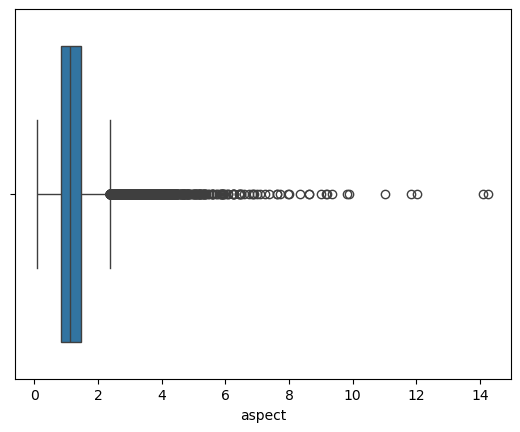

In [19]:
sns.boxplot(df_train, x="aspect")
# sns.boxplot(df_train[df_train["width"] <= 300], x="width")

In [20]:
df_train[df_train["size"] <= 224439].describe()

,confidence,ymin,xmin,ymax,xmax,width,height,size,aspect
count,35579.0,35579.000000,35579.000000,35579.000000,35579.000000,35579.000000,35579.000000,35579.000000,35577.000000
mean,1.0,1113.998096,1656.416763,1269.082900,1831.687413,175.270650,155.084805,38161.329632,1.210412
std,0.0,690.898802,970.248294,715.811331,996.353659,139.220315,116.198288,49793.506051,0.600883
min,1.0,0.000000,0.000000,30.998991,17.225673,0.000000,0.000000,0.000000,0.091703
25%,1.0,575.161683,881.323170,700.200713,1016.969572,77.882463,72.283465,5857.536822,0.839177
50%,1.0,1012.101449,1549.899076,1164.714867,1728.216379,126.437829,113.288751,14443.517533,1.103534
75%,1.0,1581.502776,2347.250601,1755.181253,2543.430048,237.984596,213.675558,51430.817638,1.428571
max,1.0,4295.942029,5908.600181,4480.000000,6287.183099,1684.300482,1055.010352,224411.826776,14.262997


In [21]:
df_train.head()

,Image_ID,confidence,class,ymin,xmin,ymax,xmax,width,height,size,aspect
0,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,194.649671,328.803454,208.107730,341.967928,13.164474,13.458059,177.168266,0.978185
1,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,149.632401,256.768914,162.910362,266.195724,9.426809,13.277961,125.168801,0.709959
2,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,234.046875,327.138158,252.712993,338.876645,11.738487,18.666118,219.111985,0.628866
3,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,221.277138,340.411184,238.593750,354.651316,14.240132,17.316612,246.590831,0.822339
4,id_11ee1c.jpg,1.0,Pepper_Fusarium,2000.563598,989.588908,2184.252196,1401.748952,412.160044,183.688598,75709.100730,2.243798


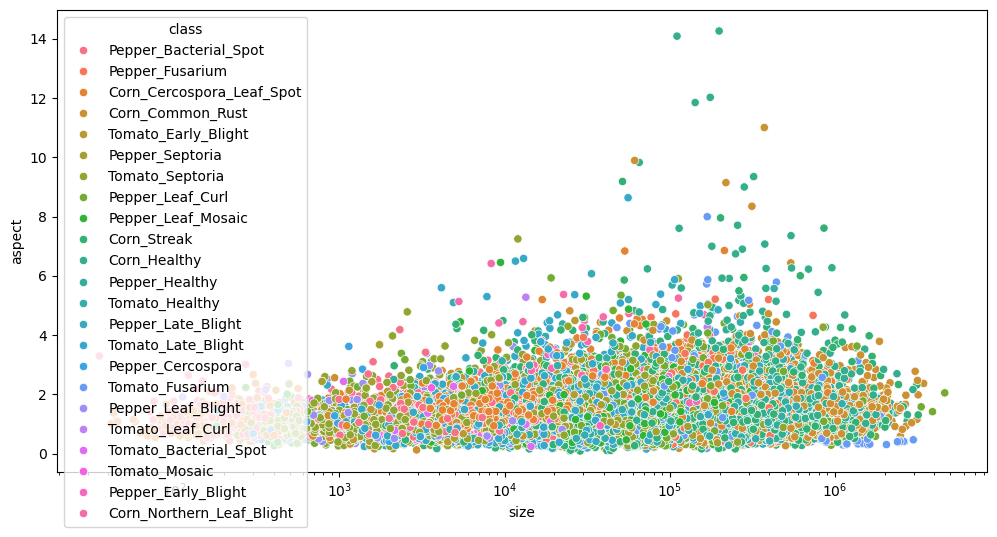

In [22]:
figure = plt.figure(figsize=(12,6))
sns.scatterplot(df_train, x="size", y="aspect", hue="class")
plt.xscale("log")
# plt.axhline(1)
# plt.xlim((10000,100000))
plt.show()

### Testing Hypotheses

In [23]:
def sampling_dist(data, sample_size=1000, num_samples=100):
    np.random.seed(42)
    means = []
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        means.append(np.mean(sample))

    std = np.std(data)/np.sqrt(sample_size)
    return means, std

def get_z(data, means, sampling_std):
    data_mean = np.mean(data)
    sampling_mean = np.mean(means)
    return  (data_mean - sampling_mean)/sampling_std

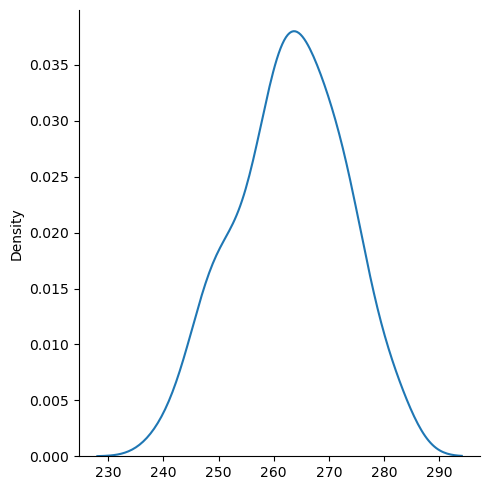

In [24]:
feature = "width"
means,sampling_dist_std = sampling_dist(df_train[feature])
sns.displot(means, kind="kde")

In [25]:
# get_z(df_train[df_train["class"]=="Corn_Common_Rust"]["size"], means, sampling_dist_std)
for cat in df_train["class"].unique():
    z = get_z(df_train[df_train["class"]==cat][feature], means, sampling_dist_std)
    print(cat,z)

Pepper_Bacterial_Spot -21.73228648539697
Pepper_Fusarium 25.74594385079674
Corn_Cercospora_Leaf_Spot -13.414282388635932
Corn_Common_Rust 62.33579950305617
Tomato_Early_Blight -13.680373762852517
Pepper_Septoria -6.405864194093942
Tomato_Septoria -14.27170646079667
Pepper_Leaf_Curl 5.794667685869957
Pepper_Leaf_Mosaic -1.6516070435226804
Corn_Streak 24.057559593589193
Corn_Healthy 52.07223901093033
Pepper_Healthy 33.811271321635004
Tomato_Healthy 7.7104569104534155
Pepper_Late_Blight -13.558772036796507
Tomato_Late_Blight -11.478290499816957
Pepper_Cercospora -21.650806848606702
Tomato_Fusarium 13.290595661442463
Pepper_Leaf_Blight -18.452723431176892
Tomato_Leaf_Curl 5.703010882699648
Tomato_Bacterial_Spot -18.996133975685314
Tomato_Mosaic -4.001953595254088
Pepper_Early_Blight -5.660234313658252
Corn_Northern_Leaf_Blight -0.47912419141050694


In [26]:
df_train["class"].value_counts()

class
Corn_Cercospora_Leaf_Spot    6538
Tomato_Septoria              6483
Tomato_Late_Blight           3918
Corn_Streak                  3180
Tomato_Healthy               2872
Pepper_Septoria              2295
Pepper_Leaf_Mosaic           2113
Tomato_Early_Blight          1946
Pepper_Bacterial_Spot        1943
Corn_Common_Rust             1682
Corn_Healthy                 1571
Pepper_Leaf_Curl             1530
Tomato_Fusarium               882
Pepper_Healthy                736
Pepper_Late_Blight            575
Pepper_Leaf_Blight            508
Tomato_Bacterial_Spot         484
Pepper_Fusarium               472
Pepper_Cercospora             472
Tomato_Leaf_Curl              437
Corn_Northern_Leaf_Blight     157
Tomato_Mosaic                 134
Pepper_Early_Blight           101
Name: count, dtype: int64

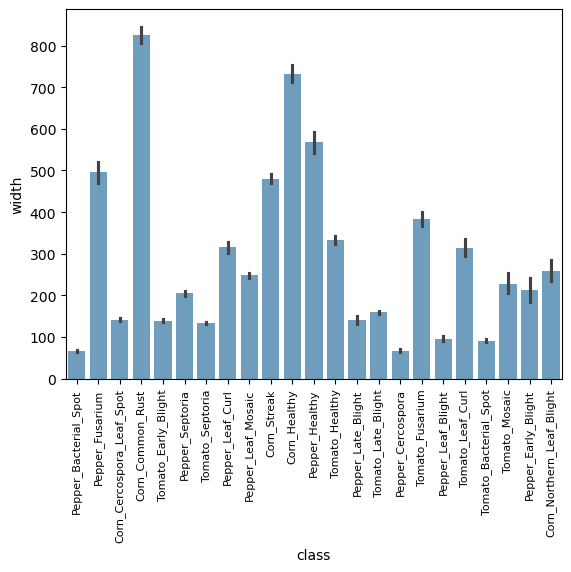

In [27]:
sns.barplot(df_train, x="class", y="width", alpha=0.7)
# sns.barplot(df_train, x="class", y="height", alpha=0.2)
plt.xticks(rotation=90, size=8)
plt.show()

In [28]:
df_train[df_train["class"] == "Tomato_Fusarium"]["aspect"].mean()

1.2576141028137067

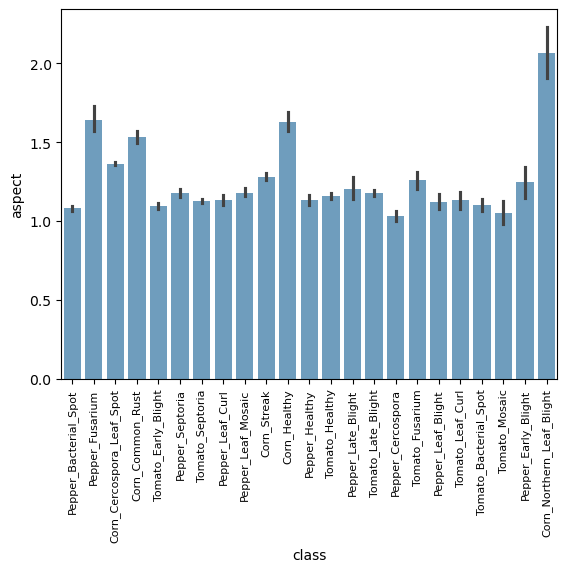

In [29]:
sns.barplot(df_train, x="class", y="aspect", alpha=0.7)
# sns.barplot(df_train, x="class", y="aspect", alpha=0.2)
plt.xticks(rotation=90, size=8)
plt.show()

In [30]:
df_train.groupby("class")[["width", "aspect"]].mean()

,width,aspect
class,,
Corn_Cercospora_Leaf_Spot,142.000048,1.363409
Corn_Common_Rust,825.442839,1.532577
Corn_Healthy,732.841534,1.628663
Corn_Northern_Leaf_Blight,258.705409,2.063376
Corn_Streak,480.083646,1.280128
Pepper_Bacterial_Spot,66.952209,1.080750
Pepper_Cercospora,67.687346,1.030957
Pepper_Early_Blight,211.959685,1.246842
Pepper_Fusarium,495.316819,1.642730


In [31]:
temp = pd.read_csv("../submissions/submission_10.csv")
disease = "Corn_Streak"
temp[temp["class"] == disease].sort_values("confidence", ascending=False)["confidence"].mean()

FileNotFoundError: [Errno 2] No such file or directory: '../submissions/submission_10.csv'

In [ ]:
sns.barplot(df_train.groupby("class")["aspect"].mean())
plt.xticks(rotation=90, size=8)
plt.show()

In [ ]:
df_train.groupby(["Image_ID", "class"]).count()["confidence"].max()

In [ ]:
df_train.groupby("Image_ID").count()["confidence"].hist()

## Finding mean overlap of boxes

In [ ]:
from torchvision.ops import box_iou
import torch

In [ ]:
def find_mean_iou(df, col="Image_ID"):
    ids = df[col].unique()
    mean_ious_per_img = []
    for id in ids:
        boxes = df_train[df_train[col] == id][["xmin", "ymin", "xmax", "ymax"]].values
        boxes = torch.from_numpy(boxes.astype(np.float32))

        if len(boxes) == 1:
            mean_ious_per_img.append(0)
            continue
            
        ious = box_iou(boxes, boxes)
        ious = np.triu(ious, 1)
        mean_iou = ious.sum()/sum(range(len(boxes)))
        mean_ious_per_img.append(mean_iou)

    return mean_ious_per_img


def miou_per_class_per_image(df, group=["Image_ID", "class"]):
    mean_ious = []
    for gname, gval in df.groupby(group):
        boxes = gval[["xmin", "ymin", "xmax", "ymax"]].values
        boxes = torch.from_numpy(boxes.astype(np.float32))

        if len(boxes) == 1:
            mean_ious.append(0)
            continue
            
        ious = box_iou(boxes, boxes)
        ious = np.triu(ious, 1)
        mean_iou = ious.sum()/sum(range(len(boxes)))
        mean_ious.append(mean_iou)

    return mean_ious
        

In [ ]:
miou = find_mean_iou(df_train)

In [ ]:
sns.displot(miou, kind="kde")

In [ ]:
mious = miou_per_class_per_image(df_train)

In [ ]:
sns.displot(mious, kind="kde")/cpi

## Clustering for bounding boxes

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(df_train[["width", "aspect"]])

In [ ]:
df_train

In [ ]:
temp = df_train.groupby(["Image_ID", "class"]).count().reset_index()

temp[temp["class"] == "Corn_Cercospora_Leaf_Spot"]

In [ ]:
temp = df_train.groupby(["Image_ID", "class"]).count().reset_index()

In [ ]:
temp = df_train.drop_duplicates(subset=["Image_ID"], keep="last")
temp.groupby("class").sample(n=6, random_state=config.SEED)["class"].value_counts()

## INSPECTING DUPLICATE BOUNDING BOXES

In [ ]:
df_train = pd.read_csv(TRAIN_PATH)

In [ ]:
without_duplicate_bboxes = df_train.drop_duplicates(subset=["xmin", "ymin", "xmax", "ymax"])
without_duplicate_bboxes_idxs = without_duplicate_bboxes.index

duplicate_bboxes = df_train[~df_train.index.isin(without_duplicate_bboxes_idxs)]

duplicate_bboxes["class"].unique()

In [ ]:
# without_duplicate_bboxes.to_csv("../data/Train_no_dup_bboxes.csv", index=False)

In [ ]:
duplicate_bboxes[duplicate_bboxes["class"].isin(["Corn_Common_Rust", "Tomato_Septoria"])].sort_values("xmin")

In [ ]:
duplicate_bboxes["class"].value_counts()

In [ ]:
temp = without_duplicate_bboxes[~without_duplicate_bboxes["Image_ID"].isin(duplicate_bboxes["Image_ID"])]["class"].value_counts()
doubles_removed_classes = set(temp.index)
temp

In [ ]:
set(df_train["class"].unique()) - doubles_removed_classes

In [ ]:
duplicate_bboxes["class"].value_counts()

### Displaying images

In [ ]:
from skimage import io
import random

In [ ]:
def show_imgs(img_paths, titles=None, nrows=2, ncols=2):
    images = [io.imread(os.path.join(img_path)) for img_path in img_paths]
    fig, axes = plt.subplots(nrows, ncols, figsize=(8,8))
    axes = axes.flatten()

    for index, image in enumerate(images):
        axes[index].imshow(image)
        axes[index].axis(False)

        if titles:
            axes[index].set_title(titles[index])

    plt.axis(False)
    plt.show()

In [ ]:
df_train = pd.read_csv(TRAIN_PATH)

In [ ]:
grouped_imgs = df_train.groupby("class")["Image_ID"].agg(list)

In [ ]:
image_classes = ["Tomato_Healthy", "Pepper_Healthy", "Tomato_Septoria", "Pepper_Septoria"]
paths = []
titles = []

seed = 1260
rng = np.random.default_rng(seed)
for image_class in image_classes:
    selected_img = rng.choice(grouped_imgs[image_class])
    path = os.path.join(IMGS_PATH, selected_img)
    paths.append(path)
    titles.append(image_class)

In [ ]:
show_imgs(paths, titles=titles)

In [ ]:
image_classes = ["Pepper_Healthy", "Pepper_Early_Blight", "Pepper_Late_Blight", "Pepper_Septoria"]
paths = []
titles = []

seed = 42
rng = np.random.default_rng(seed)
for image_class in image_classes:
    selected_img = rng.choice(grouped_imgs[image_class])
    path = os.path.join(IMGS_PATH, selected_img)
    paths.append(path)
    titles.append(image_class)

show_imgs(paths, titles=titles)

In [ ]:
temp = pd.read_csv("../data/Train_no_dup_bboxes.csv")

In [ ]:
temp.loc[temp["class"] == "Pepper_Septoria", "class"] = "Tomato_Septoria"

In [ ]:
temp.to_csv("../data/Train_no_pepper_sept.csv", index=False)

In [ ]:
temp["class"].value_counts()

### Looking at the Effects of resizing

In [ ]:
import random
from PIL import Image
import torchvision.transforms.v2.functional as F
import torchvision.transforms.v2 as F
from torchvision.io import decode_image
import torch
from utils import get_labelencoder
from torchvision import utils
from torchvision import tv_tensors

In [ ]:
labelencoder = get_labelencoder(TRAIN_PATH, "class")

In [ ]:
##### FUNCTIONS
## function to get image and it's bounding boxes
def get_sample(df, img_id):
    image = decode_image(os.path.join(IMGS_PATH, img_id))
    img_df = df[df["Image_ID"] == img_id]
    target = {}
    target["boxes"] = torch.from_numpy(img_df[["xmin", "ymin", "xmax", "ymax"]].values.astype(np.float32))
    target["labels"] = torch.tensor(labelencoder.transform(img_df["class"]), dtype=torch.int64)

    return image, target

def get_fmap_fpn_layer(fmap_dict, layer_name):
    fmap = fmap_dict[layer_name].squeeze(0)
    fmap = normalize_fmap(fmap)
    return fmap.mean(dim=0)
    
def normalize_fmap(fmap):
    fmin = fmap.min(dim=-1, keepdim=True)[0].min(dim=-2, keepdim=True)[0]
    fmax = fmap.max(dim=-1, keepdim=True)[0].max(dim=-2, keepdim=True)[0]

    fmap_norm = (fmap-fmin)/(fmax-fmin)
    return fmap_norm

def draw_bboxes(image, bbox_dict, width=4, color="blue", font_size=50):
    font = "/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf"
    boxes = bbox_dict["boxes"]
    labels = bbox_dict["labels"]
    return utils.draw_bounding_boxes(image, boxes, [str(label.item()) for label in labels], width=width, font=font, font_size=font_size, colors=[color] * len(labels))

In [ ]:
imgs = df_train[df_train["class"] == "Corn_Cercospora_Leaf_Spot"]["Image_ID"].unique()
random_img = random.choice(imgs) #'id_ptepyp.jpg'

In [ ]:
image, target = get_sample(df_train, random_img)

In [32]:
bbox_img = draw_bboxes(image, target)


plt.figure(figsize=(15,12))
plt.imshow(bbox_img.permute(1,2,0).cpu().numpy(), cmap="viridis")
plt.axis("off")
plt.show()

NameError: name 'draw_bboxes' is not defined

In [33]:
# res = F.Resize(1000, antialias=True)
res = F.Resize(800)
target["boxes"] = tv_tensors.BoundingBoxes(target["boxes"], format="XYXY", canvas_size=image.shape[-2:])
trans_image, trans_target = res(image, target)

NameError: name 'F' is not defined

In [34]:
bbox_img = draw_bboxes(trans_image, trans_target)


plt.figure(figsize=(15,12))
plt.imshow(bbox_img.permute(1,2,0).cpu().numpy(), cmap="viridis")
plt.axis("off")
plt.show()

NameError: name 'draw_bboxes' is not defined

In [35]:
temp = df_train.drop_duplicates(subset="Image_ID")
temp[temp["Image_ID"] == "id_11543h.jpg"]["class"].values[0]

'Pepper_Bacterial_Spot'

In [36]:
df_train.drop_duplicates(subset=["Image_ID"])["class"].value_counts()

class
Corn_Cercospora_Leaf_Spot    659
Pepper_Leaf_Mosaic           502
Pepper_Leaf_Curl             488
Pepper_Bacterial_Spot        458
Tomato_Septoria              345
Corn_Streak                  319
Tomato_Late_Blight           268
Pepper_Healthy               266
Tomato_Healthy               228
Corn_Common_Rust             213
Corn_Healthy                 201
Pepper_Fusarium              195
Tomato_Early_Blight          184
Pepper_Leaf_Blight           171
Pepper_Cercospora            132
Tomato_Fusarium               83
Pepper_Septoria               62
Tomato_Leaf_Curl              43
Tomato_Bacterial_Spot         41
Corn_Northern_Leaf_Blight     17
Pepper_Late_Blight            13
Tomato_Mosaic                  9
Pepper_Early_Blight            5
Name: count, dtype: int64

In [37]:
import ultralytics

In [38]:
yolo_model = ultralytics.YOLO()

In [39]:
dir(yolo_model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_check_is_pytorch_model',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_

In [40]:
yolo_model.model({})

KeyError: 'img'

In [47]:
df_train.groupby(["xmin", "ymin", "xmax", "ymax"]).count().sort_values("Image_ID", ascending=False)

,,,,Image_ID,confidence,class,width,height,size,aspect
xmin,ymin,xmax,ymax,,,,,,,
4.204240,575.539859,132.395693,673.980827,4,4,4,4,4,4,4
493.460633,124.611504,587.846568,222.875883,4,4,4,4,4,4,4
574.274899,613.708375,768.482503,782.552977,4,4,4,4,4,4,4
86.027927,439.202825,249.221063,509.268416,4,4,4,4,4,4,4
1714.875505,733.794147,1902.148385,821.099899,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
1119.892197,742.915811,1316.144764,1002.325462,1,1,1,1,1,1,1
1119.919840,499.453908,1138.266533,520.080160,1,1,1,1,1,1,1
1119.944406,648.213542,1397.804031,843.713542,1,1,1,1,1,1,1


In [50]:
df_train[df_train["class"]=="Pepper_Early_Blight"]["class"].value_counts()

class
Pepper_Early_Blight    101
Name: count, dtype: int64

## Inspecting sample submission

In [86]:
def compare(train_df, sub_df, feature, x="class"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,9))

    assert (x in submission and x in train_df), f"Both dataframes should contain column {x}"
    assert (feature in submission and feature in train_df), f"Both dataframe should have column {feature}"

    ## sorting based on class
    train_df = train_df.sort_values("class")
    sub_df = sub_df.sort_values("class")
    
    ## plotting training data
    sns.barplot(train_df, x=x, y=feature, ax=ax1)
    ax1.set_title("Training")
    ax1.tick_params(axis='x', rotation=90, size=8)

    ## plotting submission data
    sns.barplot(sub_df, x=x, y=feature, ax=ax2)
    ax2.set_title("Submission")
    ax2.tick_params(axis="x", rotation=90, size=8)
    
    plt.show()

In [87]:
submission = pd.read_csv("../submissions/submission_17.csv")

In [88]:
submission["width"] = submission["xmax"] - submission["xmin"]
submission["height"] = submission["ymax"] - submission["ymin"]
submission["aspect"] = submission["width"]/submission["height"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


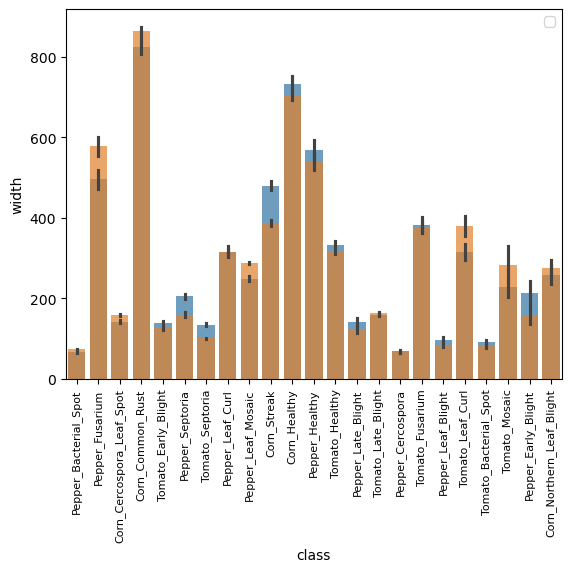

In [107]:
# sns.barplot(submission, x="class", y="width", alpha=0.7)
# # sns.barplot(df_train, x="class", y="height", alpha=0.2)
# plt.xticks(rotation=90, size=8)
# plt.show()
# compare(df_train, submission, "width")

sns.barplot(df_train, x="class", y="width", alpha=0.7)
sns.barplot(submission, x="class", y="width", alpha=0.7)
# sns.barplot(df_train, x="class", y="height", alpha=0.2)
plt.xticks(rotation=90, size=8)
plt.show()

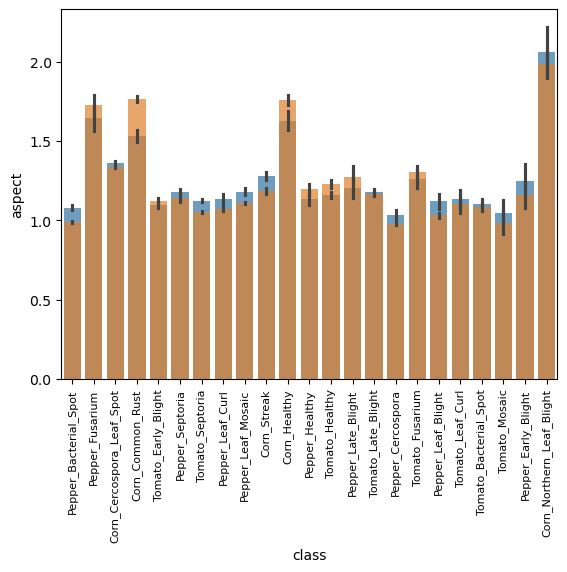

In [108]:
sns.barplot(df_train, x="class", y="aspect", alpha=0.7)
sns.barplot(submission, x="class", y="aspect", alpha=0.7)
# sns.barplot(df_train, x="class", y="height", alpha=0.2)
plt.xticks(rotation=90, size=8)
plt.show()

In [94]:
train_sub = df_train[["class", "aspect", "width", "height"]].groupby("class").mean()
sub_sub = submission[["class", "aspect", "width", "height"]].groupby("class").mean()

In [104]:
(train_sub-sub_sub).sort_values(["aspect"])

aspect    0.007531
width     2.215067
height    9.861979
dtype: float64

In [121]:
from _utils import get_labelencoder
encoder = get_labelencoder(TRAIN_PATH, "class")

In [122]:
# df_train.drop_duplicates(subset="Image_ID", ignore_index=True)["class"].value_counts()
df_train["class"] = encoder.transform(df_train["class"])

In [132]:
from pathlib import Path

k = Path("word")/"dl"

str("fk")

'fk'